In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from google.colab import files

In [2]:
# 2. Upload dataset
uploaded = files.upload()


Saving heart_disease.csv to heart_disease.csv


In [3]:
df_scaled = pd.read_csv("heart_disease.csv")
print("Dataset shape:", df_scaled.shape)
df_scaled.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,-0.764198


In [4]:
# Initialize PCA with all components
pca = PCA()
pca_array = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(
    pca_array,
    columns=[f"PC{i+1}" for i in range(pca_array.shape[1])]
)

print("Shape after PCA:", df_pca.shape)
df_pca.head()

Shape after PCA: (303, 14)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.651163,-1.106431,3.071051,2.575371,0.117268,0.358663,0.968813,-0.202191,1.676169,-0.427145,0.132852,0.561915,-0.079368,-0.231732
1,3.259755,-1.580681,-0.478407,-0.766634,-0.203525,-0.391624,0.480637,1.110803,-0.489985,1.425112,-1.020141,-0.886017,-0.964170,-0.843358
2,2.900202,0.426239,-0.428394,-0.356311,-0.057249,-0.599778,0.802106,0.608581,0.396356,0.359523,-0.118299,1.366269,0.323924,-0.971594
3,-0.714411,1.347818,0.291130,2.734652,1.056046,-0.526254,-0.678602,-2.178072,-0.158295,0.116413,-1.746660,0.145363,-0.455651,-0.580367
4,-2.380295,-0.291861,-0.054078,0.946722,0.968646,-0.321541,0.705788,-0.344953,-1.192677,0.539448,0.873123,-0.009618,1.134418,-0.093668


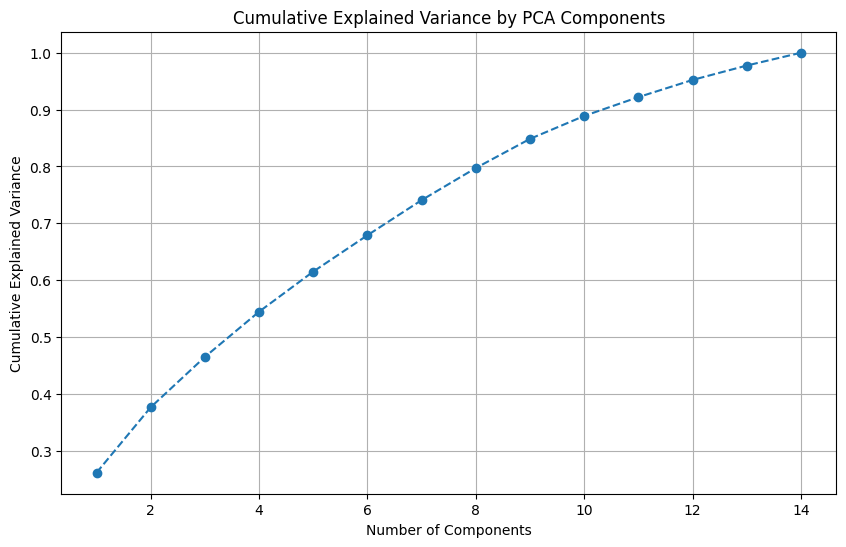

In [5]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [6]:
# Keep enough components to explain 95% variance
pca_optimal = PCA(n_components=0.95)
pca_array_opt = pca_optimal.fit_transform(df_scaled)

# Create reduced DataFrame
df_pca_opt = pd.DataFrame(
    pca_array_opt,
    columns=[f"PC{i+1}" for i in range(pca_array_opt.shape[1])]
)

print("✅ Optimal number of components:", pca_optimal.n_components_)
print("Shape after PCA (reduced):", df_pca_opt.shape)
df_pca_opt.head()

✅ Optimal number of components: 12
Shape after PCA (reduced): (303, 12)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.651163,-1.106431,3.071051,2.575371,0.117268,0.358663,0.968813,-0.202191,1.676169,-0.427145,0.132852,0.561915
1,3.259755,-1.580681,-0.478407,-0.766634,-0.203525,-0.391624,0.480637,1.110803,-0.489985,1.425112,-1.020141,-0.886017
2,2.900202,0.426239,-0.428394,-0.356311,-0.057249,-0.599778,0.802106,0.608581,0.396356,0.359523,-0.118299,1.366269
3,-0.714411,1.347818,0.291130,2.734652,1.056046,-0.526254,-0.678602,-2.178072,-0.158295,0.116413,-1.746660,0.145363
4,-2.380295,-0.291861,-0.054078,0.946722,0.968646,-0.321541,0.705788,-0.344953,-1.192677,0.539448,0.873123,-0.009618


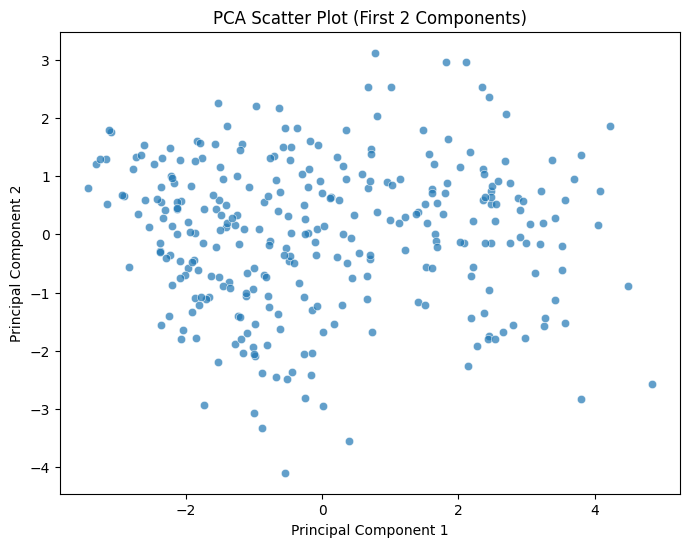

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca_opt["PC1"], y=df_pca_opt["PC2"], alpha=0.7)
plt.title("PCA Scatter Plot (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [8]:
# Save PCA-transformed dataset
df_pca_opt.to_csv("heart_disease_pca.csv", index=False)

# Download it to your computer
files.download("heart_disease_pca.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>